# Step 1 - Import library, upload data, data exploration


### 1.1. Import library

In [1]:
import lib.step1ml_utilis_summaryPre_processing as pre
import lib.step7ml_utilis_NLP_Vietnamese as nlp
import matplotlib
import matplotlib_inline
%matplotlib inline
import warnings
warnings.filterwarnings("ignore")

### 1.2. Upload Data

In [2]:
dir_file = "data_analysis/ProductRaw.csv"
#names = ['item_id','name','description','rating','price','list_price','brand','group','url','image']
#df = pre.loadData(file_dir=dir_file, names=names)
#df = df.iloc[1: , :]
#data = df.copy()

import pandas as pd

df = pd.read_csv(dir_file, encoding='utf-8')
data = df.copy()
data.head()

,item_id,name,description,rating,price,list_price,brand,group,url,image
0,48102821,Tai nghe Bluetooth Inpods 12 - Cảm biến vân ta...,THÔNG TIN CHI TIẾT\nDung lượng pin 300\nThời g...,4.0,77000,300000,OEM,Thiết Bị Số - Phụ Kiện Số/Thiết Bị Âm Thanh và...,https://tai-nghe-bluetooth-inpods-12-cam-bien-...,https://salt.tikicdn.com/cache/280x280/ts/prod...
1,52333193,Tai nghe bluetooth không dây F9 True wireless ...,THÔNG TIN CHI TIẾT\nDung lượng pin 2000mah\nTh...,4.5,132000,750000,OEM,Thiết Bị Số - Phụ Kiện Số/Thiết Bị Âm Thanh và...,https://tai-nghe-bluetooth-khong-day-f9-true-w...,https://salt.tikicdn.com/cache/280x280/ts/prod...
2,299461,Chuột Không Dây Logitech M331 Silent - Hàng Ch...,THÔNG TIN CHI TIẾT\nThương hiệu Logitech\nĐộ p...,4.8,299000,399000,Logitech,Thiết Bị Số - Phụ Kiện Số/Phụ kiện máy tính và...,https://chuot-khong-day-logitech-m331-silent-p...,https://salt.tikicdn.com/cache/280x280/media/c...
3,57440329,Loa Bluetooth 5.0 Kiêm Đồng Hồ Báo Thức - [[ 2...,THÔNG TIN CHI TIẾT\nThương hiệu Acome\nXuất xứ...,4.7,149000,350000,Acome,Thiết Bị Số - Phụ Kiện Số/Thiết Bị Âm Thanh và...,https://loa-bluetooth-5-0-kiem-dong-ho-bao-thu...,https://salt.tikicdn.com/cache/280x280/ts/prod...
4,38458616,Tai Nghe Bluetooth Apple AirPods Pro True Wire...,THÔNG TIN CHI TIẾT\nThương hiệu Apple\nXuất xứ...,4.8,5090000,8500000,Apple,Thiết Bị Số - Phụ Kiện Số/Thiết Bị Âm Thanh và...,https://tai-nghe-bluetooth-apple-airpods-pro-t...,https://salt.tikicdn.com/cache/280x280/ts/prod...


### Mục tiêu file ProductRaw
- Dùng để xem item nào và đánh giá mực độ hài lòng của khách hàng với sản phẩm
- Biết được đơn giá, giá bán không bao gồm chi phí marketing

### 1.3. Summary process
- 5 Dòng đầu tiên/ 5 dòng cuối => Xem dữ liệu thế và có cách nhìn về dữ liệu trước, phỏng đoán về dữ liệu
- Nhìn vào xem kiểu dữ liệu đúng chưa, nếu chưa cần phân tích tiếp
- Xem dữ liệu có những liệu lỗi không: NAN, NULL
- Có thể sử dụng thư viện profile report để nhìn qua dữ liệu và nó sẽ xuyên xuốt trong quá trình làm tiền xử lý dữ liệu
- Xem tỉ lệ dữ liệu duplicate => tìm hiểu nguyên nhân và cách xử lý nó => Thường thì sẽ xóa

In [3]:
# Xem 5 thông tin đầu
pre.startInformation(df=df,choose="head", head=5)

close


,item_id,name,description,rating,price,list_price,brand,group,url,image
0,48102821,Tai nghe Bluetooth Inpods 12 - Cảm biến vân ta...,THÔNG TIN CHI TIẾT\nDung lượng pin 300\nThời g...,4.0,77000,300000,OEM,Thiết Bị Số - Phụ Kiện Số/Thiết Bị Âm Thanh và...,https://tai-nghe-bluetooth-inpods-12-cam-bien-...,https://salt.tikicdn.com/cache/280x280/ts/prod...
1,52333193,Tai nghe bluetooth không dây F9 True wireless ...,THÔNG TIN CHI TIẾT\nDung lượng pin 2000mah\nTh...,4.5,132000,750000,OEM,Thiết Bị Số - Phụ Kiện Số/Thiết Bị Âm Thanh và...,https://tai-nghe-bluetooth-khong-day-f9-true-w...,https://salt.tikicdn.com/cache/280x280/ts/prod...
2,299461,Chuột Không Dây Logitech M331 Silent - Hàng Ch...,THÔNG TIN CHI TIẾT\nThương hiệu Logitech\nĐộ p...,4.8,299000,399000,Logitech,Thiết Bị Số - Phụ Kiện Số/Phụ kiện máy tính và...,https://chuot-khong-day-logitech-m331-silent-p...,https://salt.tikicdn.com/cache/280x280/media/c...
3,57440329,Loa Bluetooth 5.0 Kiêm Đồng Hồ Báo Thức - [[ 2...,THÔNG TIN CHI TIẾT\nThương hiệu Acome\nXuất xứ...,4.7,149000,350000,Acome,Thiết Bị Số - Phụ Kiện Số/Thiết Bị Âm Thanh và...,https://loa-bluetooth-5-0-kiem-dong-ho-bao-thu...,https://salt.tikicdn.com/cache/280x280/ts/prod...
4,38458616,Tai Nghe Bluetooth Apple AirPods Pro True Wire...,THÔNG TIN CHI TIẾT\nThương hiệu Apple\nXuất xứ...,4.8,5090000,8500000,Apple,Thiết Bị Số - Phụ Kiện Số/Thiết Bị Âm Thanh và...,https://tai-nghe-bluetooth-apple-airpods-pro-t...,https://salt.tikicdn.com/cache/280x280/ts/prod...


In [4]:
# Xem tail
pre.startInformation(df=df,choose="tail", head=5)

close


,item_id,name,description,rating,price,list_price,brand,group,url,image
4394,19407194,Loa karaoke Bluetooth Mini P88/P89 kèm micro c...,THÔNG TIN CHI TIẾT\nThương hiệu OEM\nXuất xứ t...,3.7,226000,300000,OEM,Điện Tử - Điện Lạnh/Âm thanh & Phụ kiện Tivi/L...,https://loa-karaoke-bluetooth-mini-p88-p89-kem...,https://salt.tikicdn.com/cache/280x280/ts/prod...
4395,53716886,Máy giặt Samsung Addwash Inverter 9 Kg WW90K44...,THÔNG TIN CHI TIẾT\nThương hiệu Samsung\nXuất ...,4.5,8090000,12490000,Samsung,Điện Tử - Điện Lạnh/Máy giặt,https://may-giat-samsung-addwash-inverter-9-kg...,https://salt.tikicdn.com/cache/280x280/ts/prod...
4396,22967676,"Loa tép AT46, hàng chính hãng",THÔNG TIN CHI TIẾT\nThương hiệu Thumper\nKích ...,0.0,168000,250000,Thumper,Điện Tử - Điện Lạnh/Âm thanh & Phụ kiện Tivi/L...,https://loa-tep-at46-hang-chinh-hang-p22967676...,https://salt.tikicdn.com/cache/280x280/ts/prod...
4397,29245831,Máy sấy Electrolux 8 Kg EDV805JQWA,THÔNG TIN CHI TIẾT\nBảng điều khiển Điện tử\nT...,5.0,8149000,10690000,Electrolux,Điện Tử - Điện Lạnh/Máy sấy quần áo,https://may-say-electrolux-8-kg-edv805jqwa-p29...,https://salt.tikicdn.com/cache/280x280/ts/prod...
4398,68495317,Dàn karaoke và nghe nhạc PA - 8800 II BellPlus...,THÔNG TIN CHI TIẾT\nThương hiệu BELLPLUS\nXuất...,0.0,10650000,17900000,BELLPLUS,Điện Tử - Điện Lạnh/Âm thanh & Phụ kiện Tivi/D...,https://dan-karaoke-va-nghe-nhac-pa-8800-ii-be...,https://salt.tikicdn.com/cache/280x280/ts/prod...
4399,14497425,Máy Lạnh LG Inverter 1 HP V10APH,THÔNG TIN CHI TIẾT\nCông suất làm lạnh 1.0HP\n...,3.0,7790000,11090000,LG,Điện Tử - Điện Lạnh/Máy lạnh - Máy điều hòa,https://may-lanh-lg-inverter-1-hp-v10aph-p1449...,https://salt.tikicdn.com/cache/280x280/ts/prod...
4400,52294251,Micro Không Dây Alpha Works A1 Chính Hãng,THÔNG TIN CHI TIẾT\nThương hiệu OEM\nXuất xứ t...,0.0,1450000,1890000,OEM,Điện Tử - Điện Lạnh/Âm thanh & Phụ kiện Tivi/M...,https://micro-khong-day-alpha-works-a1-chinh-h...,https://salt.tikicdn.com/cache/280x280/ts/prod...
4401,29246309,Máy sấy Electrolux 8 Kg EDV805JQSA,THÔNG TIN CHI TIẾT\nBảng điều khiển Điều khiển...,4.4,8790000,11290000,Electrolux,Điện Tử - Điện Lạnh/Máy sấy quần áo,https://may-say-electrolux-8-kg-edv805jqsa-p29...,https://salt.tikicdn.com/cache/280x280/ts/prod...
4402,48574854,"Bộ Chia 2 Pacific Dùng Chia Truyền Hình Cáp, A...",THÔNG TIN CHI TIẾT\nThương hiệu Pacific\nXuất ...,5.0,34000,49000,Pacific,Điện Tử - Điện Lạnh/Âm thanh & Phụ kiện Tivi/P...,https://bo-chia-2-pacific-dung-chia-truyen-hin...,https://salt.tikicdn.com/cache/280x280/ts/prod...
4403,60228865,Micro Đôi Karaoke - Micro Không Dây MV 01 - Hà...,THÔNG TIN CHI TIẾT\nThương hiệu Shubole\nXuất ...,4.0,360000,500000,Shubole,Điện Tử - Điện Lạnh/Âm thanh & Phụ kiện Tivi/M...,https://micro-doi-karaoke-micro-khong-day-mv-0...,https://salt.tikicdn.com/cache/280x280/ts/prod...


In [5]:
# Thông tin về dữ liệu
pre.startInformation(df=df,choose="info", head=5)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4404 entries, 0 to 4403
Data columns (total 10 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   item_id      4404 non-null   int64  
 1   name         4404 non-null   object 
 2   description  4401 non-null   object 
 3   rating       4404 non-null   float64
 4   price        4404 non-null   int64  
 5   list_price   4404 non-null   int64  
 6   brand        4404 non-null   object 
 7   group        4404 non-null   object 
 8   url          4404 non-null   object 
 9   image        4404 non-null   object 
dtypes: float64(1), int64(3), object(6)
memory usage: 344.2+ KB
close


In [6]:
# Xem dữ liệu có NAN
pre.startInformation(df=df,choose="nan")

close


item_id        0
name           0
description    3
rating         0
price          0
list_price     0
brand          0
group          0
url            0
image          0
dtype: int64

In [7]:
# Xem dữ liệu null
pre.startInformation(df=df, choose="null")

close


item_id        0
name           0
description    3
rating         0
price          0
list_price     0
brand          0
group          0
url            0
image          0
dtype: int64

In [8]:
# Xem dữ liệu bao nhiêu dòng và cột
pre.startInformation(df=df,choose="shape")

close


(4404, 10)

In [9]:
# Sự dụng thư viện profile report
#pre.startInformation(df=df,choose="profile")

In [10]:
# Xem tỉ lệ dữ liệu duplicate => Đưa ra quyết định hoặc tìm hiểu vì sao dữ liệu bị lỗi
pre.percentDuplicates(df=df)

close


0.00704

### Nhận xét:
- Dữ liệu có dữ liệu duplicates, và null
- Kiểu dữ liệu chưa đúng, cần thay đổi

### 1.4. Overview dữ liệu theo trực quan hóa và dataframe
- Trực quan hóa: dữ liệu là continious hay categorical
- Dataframe dữ liệu continious hay category: Biết được min và max/ NAS: dữ liệu nan và null / kiểu dữ liệu dự kiến
- Và biết về tương đối về dữ liệu

 Categerocial   Numerical   NaN 


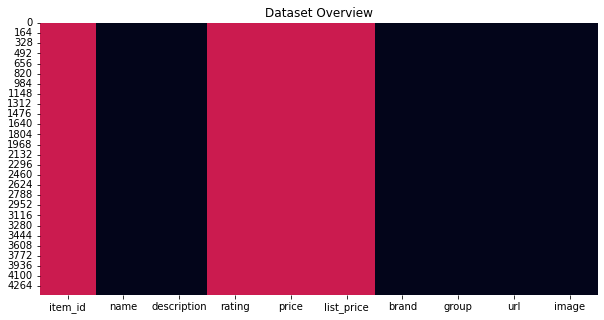

(Text(0.5, 1.0, 'Dataset Overview'), None)

In [11]:
# Nhìn biểu đồ xem dự đoán xem dữ liệu continious hay category
pre.df_overview(df=df, choose="visualization")

In [12]:
# Trực quan hóa dữ liệu overview dataset
pre.df_overview(df=df, columns=['Feature', 'Type_Feature', 'NAS', 'Check_data'])

Shape: (4404, 10)
-----------------


,Feature,Type_Feature,NAS,Check_data
0,item_id,Continious,Nas: 0(0%),Min-Max: (54665)-(85042408)
1,name,categorical,Nas: 0(0%),Categories: 4330
2,description,categorical,Nas: 3(0%),Categories: 4370
3,rating,Continious,Nas: 0(0%),Min-Max: (0)-(5)
4,price,Continious,Nas: 0(0%),Min-Max: (7000)-(62690000)
5,list_price,Continious,Nas: 0(0%),Min-Max: (12000)-(82990000)
6,brand,categorical,Nas: 0(0%),Categories: 521
7,group,categorical,Nas: 0(0%),Categories: 248
8,url,categorical,Nas: 0(0%),Categories: 4373
9,image,categorical,Nas: 0(0%),Categories: 4362


### Nhận xét:
1. Sai kiểu dữ liệu
2. Dữ liệu bị duplicates

### Việc cần làm
1. Xử lý NLP cho các thuộc tính
2. Cleaning data
3. Thực hiện data analysis
4. Chỉnh dữ liệu sao cho phù hợp với bài toán

# Step 2 - Data Cleaning - Làm sạch dữ liệu

## A. Làm sạch dữ liệu với continious

### 2.1. Xem dữ liệu continious bị missing value và null 
- Dự đoán những thuộc tính là continious => làm 1 list liên quan đến lst_continious
- Dùng hàm filterSpecialCharacter thực hiện xem những ký tự đặc biệt trong dữ liệu
- Điều chỉnh dữ liệu bị ký hiệu đặc biệt bằng các hàm mode, median, mean hoặc để bằng 0 nếu không đúng => Nếu được dụng thuật toán
- Check lại những thuộc tính đã chỉnh
- Sau đó chuyển đổi kiểu dữ liệu => Nếu fail tìm nguyên nhân
- Làm sao kết quả cuối cùng là chuyển kiểu dữ liệu cho các thuộc tính kiểu continious không bị missing value


In [13]:
df.columns

Index(['item_id', 'name', 'description', 'rating', 'price', 'list_price',
       'brand', 'group', 'url', 'image'],
      dtype='object')

In [14]:
# Check các ký tự đặc biệt trong dữ liệu số
variable_continious = [ 'rating', 'price', 'list_price']
pre.filterSpecialCharacter(df=df[variable_continious])

close
close


,rating,price,list_price


### 2.2. Chuyển đổi dữ liệu missing value vs thuộc tính continious
- Chuyển dữ liệu qua hàm changeToAstype để xem dữ liệu đúng không và xem lại
- Cần xem lại thông tin xem kiểu dữ liệu đã ok chưa

In [15]:
# Chuyển kiểu dữ liệu cho thuộc tính
lst_float = ['rating', 'price', 'list_price']
lst_int = []
pre.changeToAstype(df=df, lst_float=lst_float, lst_int=lst_int)

,item_id,name,description,rating,price,list_price,brand,group,url,image
0,48102821,Tai nghe Bluetooth Inpods 12 - Cảm biến vân ta...,THÔNG TIN CHI TIẾT\nDung lượng pin 300\nThời g...,4.0,77000.0,300000.0,OEM,Thiết Bị Số - Phụ Kiện Số/Thiết Bị Âm Thanh và...,https://tai-nghe-bluetooth-inpods-12-cam-bien-...,https://salt.tikicdn.com/cache/280x280/ts/prod...
1,52333193,Tai nghe bluetooth không dây F9 True wireless ...,THÔNG TIN CHI TIẾT\nDung lượng pin 2000mah\nTh...,4.5,132000.0,750000.0,OEM,Thiết Bị Số - Phụ Kiện Số/Thiết Bị Âm Thanh và...,https://tai-nghe-bluetooth-khong-day-f9-true-w...,https://salt.tikicdn.com/cache/280x280/ts/prod...
2,299461,Chuột Không Dây Logitech M331 Silent - Hàng Ch...,THÔNG TIN CHI TIẾT\nThương hiệu Logitech\nĐộ p...,4.8,299000.0,399000.0,Logitech,Thiết Bị Số - Phụ Kiện Số/Phụ kiện máy tính và...,https://chuot-khong-day-logitech-m331-silent-p...,https://salt.tikicdn.com/cache/280x280/media/c...
3,57440329,Loa Bluetooth 5.0 Kiêm Đồng Hồ Báo Thức - [[ 2...,THÔNG TIN CHI TIẾT\nThương hiệu Acome\nXuất xứ...,4.7,149000.0,350000.0,Acome,Thiết Bị Số - Phụ Kiện Số/Thiết Bị Âm Thanh và...,https://loa-bluetooth-5-0-kiem-dong-ho-bao-thu...,https://salt.tikicdn.com/cache/280x280/ts/prod...
4,38458616,Tai Nghe Bluetooth Apple AirPods Pro True Wire...,THÔNG TIN CHI TIẾT\nThương hiệu Apple\nXuất xứ...,4.8,5090000.0,8500000.0,Apple,Thiết Bị Số - Phụ Kiện Số/Thiết Bị Âm Thanh và...,https://tai-nghe-bluetooth-apple-airpods-pro-t...,https://salt.tikicdn.com/cache/280x280/ts/prod...
...,...,...,...,...,...,...,...,...,...,...
4399,14497425,Máy Lạnh LG Inverter 1 HP V10APH,THÔNG TIN CHI TIẾT\nCông suất làm lạnh 1.0HP\n...,3.0,7790000.0,11090000.0,LG,Điện Tử - Điện Lạnh/Máy lạnh - Máy điều hòa,https://may-lanh-lg-inverter-1-hp-v10aph-p1449...,https://salt.tikicdn.com/cache/280x280/ts/prod...
4400,52294251,Micro Không Dây Alpha Works A1 Chính Hãng,THÔNG TIN CHI TIẾT\nThương hiệu OEM\nXuất xứ t...,0.0,1450000.0,1890000.0,OEM,Điện Tử - Điện Lạnh/Âm thanh & Phụ kiện Tivi/M...,https://micro-khong-day-alpha-works-a1-chinh-h...,https://salt.tikicdn.com/cache/280x280/ts/prod...
4401,29246309,Máy sấy Electrolux 8 Kg EDV805JQSA,THÔNG TIN CHI TIẾT\nBảng điều khiển Điều khiển...,4.4,8790000.0,11290000.0,Electrolux,Điện Tử - Điện Lạnh/Máy sấy quần áo,https://may-say-electrolux-8-kg-edv805jqsa-p29...,https://salt.tikicdn.com/cache/280x280/ts/prod...
4402,48574854,"Bộ Chia 2 Pacific Dùng Chia Truyền Hình Cáp, A...",THÔNG TIN CHI TIẾT\nThương hiệu Pacific\nXuất ...,5.0,34000.0,49000.0,Pacific,Điện Tử - Điện Lạnh/Âm thanh & Phụ kiện Tivi/P...,https://bo-chia-2-pacific-dung-chia-truyen-hin...,https://salt.tikicdn.com/cache/280x280/ts/prod...


### Nhận xét: 
1. Đã chỉnh sửa lại thuộc tính

## B. CLEANING BY FEATURE

#### 2.3. Xem lại thông tin dữ liệu lại
- Có bao nhiêu cột
- Giá trị trong cột thế nào dùng hàm: checkDtypesDataAndMissingvalues
- Overview dữ liệu lại 1 lần trước khi tiến hành việc khác
- Đưa ra nhận xét cho công việc tiếp theo

In [16]:
# Kiểm tra unique values và dtype của từng cột dữ liệu
check_feature = pre.checkDtypesDataAndMissingvalues(df=df, chooses="table")
check_feature

close


,Kiểm tra biến,giá trị,Số biến,Kiểu dữ liệu
0,item_id,4373,"[54665, 55897, 104180, 116897, 122012, 125781,...",int64
1,name,4330,[\t Loa TWS Bluetooth 5.0 VIVAN VS1 – Chống Nư...,object
2,description,4371,"[MÔ TẢ SẢN PHẨM\n2.4G / 5G, Được tích hợp tron...",object
3,rating,33,"[0.0, 1.0, 1.3, 1.8, 2.0, 2.1, 2.2, 2.3, 2.5, ...",float64
4,price,1783,"[7000.0, 8990.0, 9000.0, 9200.0, 10000.0, 1170...",float64
5,list_price,955,"[12000.0, 14000.0, 15000.0, 17000.0, 24000.0, ...",float64
6,brand,521,"[\tOEM, BUBM, Casper, CoolerMaster, EZVIZ,...",object
7,group,248,[Hàng Quốc Tế/Laptop & Máy Vi Tính/Linh kiện m...,object
8,url,4373,[https://1-chiec-loa-bass-25-hang-chinh-hang-h...,object
9,image,4362,[https://salt.tikicdn.com/cache/280x280/media/...,object


In [17]:
# Overview dữ liệu lại 1 lần nữa
pre.df_overview(df=df,columns=['Feature', 'Type_Feature', 'NAS', 'Check_data'])

Shape: (4404, 10)
-----------------


,Feature,Type_Feature,NAS,Check_data
0,item_id,Continious,Nas: 0(0%),Min-Max: (54665)-(85042408)
1,name,categorical,Nas: 0(0%),Categories: 4330
2,description,categorical,Nas: 3(0%),Categories: 4370
3,rating,Continious,Nas: 0(0%),Min-Max: (0)-(5)
4,price,Continious,Nas: 0(0%),Min-Max: (7000)-(62690000)
5,list_price,Continious,Nas: 0(0%),Min-Max: (12000)-(82990000)
6,brand,categorical,Nas: 0(0%),Categories: 521
7,group,categorical,Nas: 0(0%),Categories: 248
8,url,categorical,Nas: 0(0%),Categories: 4373
9,image,categorical,Nas: 0(0%),Categories: 4362


 Categerocial   Numerical   NaN 


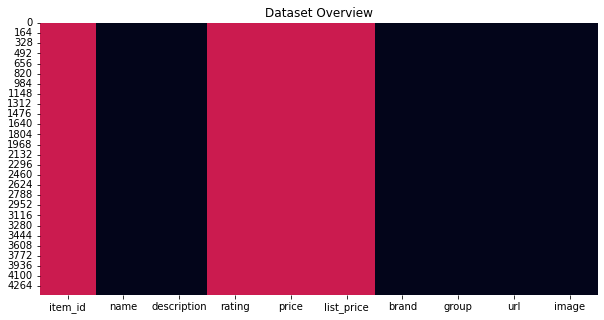

(Text(0.5, 1.0, 'Dataset Overview'), None)

In [18]:
pre.df_overview(df=df, choose="visualization")

### Nhận xét:
1. Thuộc tính cần phải xem lại kiểu dữ liệu
2. Các biến categorical cần làm NLP

### 2.4. Detail Cleaning by feature
- Thứ tự thực hiện từng thuộc tính 1 từ trái sang phải

In [19]:
df.columns

Index(['item_id', 'name', 'description', 'rating', 'price', 'list_price',
       'brand', 'group', 'url', 'image'],
      dtype='object')

#### 2.4.1. item_id

In [20]:
# Xử lý dữ liệu 
# Đã chuyển dữ liệu bằng hàm changeMisingValueContinuous
pre.filterSpecialCharacter_one_feature(df=df, lst_feature='item_id') 

close
close


Series([], Name: item_id, dtype: int64)

In [21]:
# AveragePrice
fea_item_id = pre.change_feature_seriesToDataframe(df=df, lst_feature='item_id', names='fea_item_id')
fea_item_id = fea_item_id.reset_index(drop=True)
fea_item_id

,fea_item_id
0,48102821
1,52333193
2,299461
3,57440329
4,38458616
...,...
4399,14497425
4400,52294251
4401,29246309
4402,48574854


### Item-based Collaborative Filtering - Tương tác giữa các mặt hàng
1. Recommend items that are similar to the items the user bought - Đề xuất các mặt hàng tương tự với mặt hàng mà người dùng đã mua
2. Similarity is based upon co-occurrence of purchases - Sự giống nhau dựa trên sự đồng xuất hiện của các giao dịch mua
3. Items A and B were purchased by both users x and y, so they are similar - Các mặt hàng A và B đã được mua bởi cả người dùng x và y, vì vậy chúng tương tự nhau


#### 2.4.2. name

In [22]:
# Lọc dữ liệu và loại bỏ những dữ liệu không cần thiết ra khỏi NLP
fea_name = nlp.process_nlp_vietnamese_no_number(df=df, lst_text='name',columns_='fea_name')
fea_name = fea_name.reset_index(drop=True)
fea_name

,fea_name
0,tai nghe bluetooth inpods 12 cảm_biến vân tay ...
1,tai nghe bluetooth không dây f true wireless d...
2,chuột không dây logitech m331 silenthàng chính...
3,loa bluetooth 5 kiêm đồng_hồ báo_thức 2 trong ...
4,tai nghe bluetooth apple airpods pro true wire...
...,...
4399,máy lạnh lg inverter 1 hp v1aph
4400,micro không dây alpha works a1 chính hãng
4401,máy sấy electrolux 8 kg edv85jqsa
4402,bộ chia 2 pacific dùng chia truyền_hình cáp an...


In [23]:
# Stop_word những từ không cần thiết ra khỏi dữ liệu
fea_name_2 = nlp.txt_stop_word(df=fea_name, lst_text='fea_name', columns_='fea_name_2')
fea_name_2 = fea_name_2.reset_index(drop=True)
fea_name_2

,fea_name_2
0,tai bluetooth inpods 12 cảm_biến vân chống nướ...
1,tai bluetooth không dây f true wireless dock s...
2,chuột không dây logitech m331 silenthàng hãng
3,loa bluetooth 5 kiêm đồng_hồ báo_thức 2 1 robo...
4,tai bluetooth apple airpods pro true wirelessm...
...,...
4399,máy lạnh lg inverter 1 hp v1aph
4400,micro không dây alpha works a1 hãng
4401,máy sấy electrolux 8 kg edv85jqsa
4402,chia 2 pacific chia truyền_hình cáp anten ktsh...


In [24]:
fea_name_2.isnull().sum()

fea_name_2    0
dtype: int64

In [25]:
# Lấy dữ liệu theo số lần lặp để thực hiện lấy những cụm từ có ý nghĩa trong bài toán của chúng ta
fea_name_3 = nlp.groupby_word_txt(df=df, lst_text='name', columns_='fea_name_3')
fea_name_3

,Num
fea_name_3,
hàng,2804
hãng,2369
chính,2355
cho,737
nhập_khẩu,617
...,...
qhd,1
qgeem,1
giảm_giá,1


#### 2.4.3. description

In [26]:
# Dữ liệu null
lst_continuous = ['description']
fea_description_0 = pre.changeMisingValueContinuous(df=df, choose='other', lst_continuous=lst_continuous)
fea_description_0

close


,item_id,name,description,rating,price,list_price,brand,group,url,image
0,48102821,Tai nghe Bluetooth Inpods 12 - Cảm biến vân ta...,THÔNG TIN CHI TIẾT\nDung lượng pin 300\nThời g...,4.0,77000.0,300000.0,OEM,Thiết Bị Số - Phụ Kiện Số/Thiết Bị Âm Thanh và...,https://tai-nghe-bluetooth-inpods-12-cam-bien-...,https://salt.tikicdn.com/cache/280x280/ts/prod...
1,52333193,Tai nghe bluetooth không dây F9 True wireless ...,THÔNG TIN CHI TIẾT\nDung lượng pin 2000mah\nTh...,4.5,132000.0,750000.0,OEM,Thiết Bị Số - Phụ Kiện Số/Thiết Bị Âm Thanh và...,https://tai-nghe-bluetooth-khong-day-f9-true-w...,https://salt.tikicdn.com/cache/280x280/ts/prod...
2,299461,Chuột Không Dây Logitech M331 Silent - Hàng Ch...,THÔNG TIN CHI TIẾT\nThương hiệu Logitech\nĐộ p...,4.8,299000.0,399000.0,Logitech,Thiết Bị Số - Phụ Kiện Số/Phụ kiện máy tính và...,https://chuot-khong-day-logitech-m331-silent-p...,https://salt.tikicdn.com/cache/280x280/media/c...
3,57440329,Loa Bluetooth 5.0 Kiêm Đồng Hồ Báo Thức - [[ 2...,THÔNG TIN CHI TIẾT\nThương hiệu Acome\nXuất xứ...,4.7,149000.0,350000.0,Acome,Thiết Bị Số - Phụ Kiện Số/Thiết Bị Âm Thanh và...,https://loa-bluetooth-5-0-kiem-dong-ho-bao-thu...,https://salt.tikicdn.com/cache/280x280/ts/prod...
4,38458616,Tai Nghe Bluetooth Apple AirPods Pro True Wire...,THÔNG TIN CHI TIẾT\nThương hiệu Apple\nXuất xứ...,4.8,5090000.0,8500000.0,Apple,Thiết Bị Số - Phụ Kiện Số/Thiết Bị Âm Thanh và...,https://tai-nghe-bluetooth-apple-airpods-pro-t...,https://salt.tikicdn.com/cache/280x280/ts/prod...
...,...,...,...,...,...,...,...,...,...,...
4399,14497425,Máy Lạnh LG Inverter 1 HP V10APH,THÔNG TIN CHI TIẾT\nCông suất làm lạnh 1.0HP\n...,3.0,7790000.0,11090000.0,LG,Điện Tử - Điện Lạnh/Máy lạnh - Máy điều hòa,https://may-lanh-lg-inverter-1-hp-v10aph-p1449...,https://salt.tikicdn.com/cache/280x280/ts/prod...
4400,52294251,Micro Không Dây Alpha Works A1 Chính Hãng,THÔNG TIN CHI TIẾT\nThương hiệu OEM\nXuất xứ t...,0.0,1450000.0,1890000.0,OEM,Điện Tử - Điện Lạnh/Âm thanh & Phụ kiện Tivi/M...,https://micro-khong-day-alpha-works-a1-chinh-h...,https://salt.tikicdn.com/cache/280x280/ts/prod...
4401,29246309,Máy sấy Electrolux 8 Kg EDV805JQSA,THÔNG TIN CHI TIẾT\nBảng điều khiển Điều khiển...,4.4,8790000.0,11290000.0,Electrolux,Điện Tử - Điện Lạnh/Máy sấy quần áo,https://may-say-electrolux-8-kg-edv805jqsa-p29...,https://salt.tikicdn.com/cache/280x280/ts/prod...
4402,48574854,"Bộ Chia 2 Pacific Dùng Chia Truyền Hình Cáp, A...",THÔNG TIN CHI TIẾT\nThương hiệu Pacific\nXuất ...,5.0,34000.0,49000.0,Pacific,Điện Tử - Điện Lạnh/Âm thanh & Phụ kiện Tivi/P...,https://bo-chia-2-pacific-dung-chia-truyen-hin...,https://salt.tikicdn.com/cache/280x280/ts/prod...


In [27]:
# Lọc dữ liệu và loại bỏ những dữ liệu không cần thiết ra khỏi NLP
fea_description_1 = nlp.process_nlp_vietnamese_no_number(df=fea_description_0, lst_text='description',columns_='fea_description')
fea_description_1 = fea_description_1.reset_index(drop=True)
fea_description_1

,fea_description
0,thông_tin chi_tiết dung_lượng pin 3 thời_gian ...
1,thông_tin chi_tiết dung_lượng pin 2 mah thời_g...
2,thông_tin chi_tiết thương_hiệu logitech độ phâ...
3,thông_tin chi_tiết thương_hiệu acome xuất_xứ t...
4,thông_tin chi_tiết thương_hiệu apple xuất_xứ t...
...,...
4399,thông_tin chi_tiết công_suất làm lạnh 1 hp phạ...
4400,thông_tin chi_tiết thương_hiệu oem xuất_xứ thư...
4401,thông_tin chi_tiết bảng điều_khiển điều_khiển ...
4402,thông_tin chi_tiết thương_hiệu pacific xuất_xứ...


In [28]:
fea_description_1.isnull().sum()

fea_description    0
dtype: int64

In [29]:
# Lấy dữ liệu theo số lần lặp để thực hiện lấy những cụm từ có ý nghĩa trong bài toán của chúng ta
fea_description_2 = nlp.groupby_word_txt(df=fea_description_1, lst_text='fea_description', columns_='fea_description_2')
fea_description_2

,Num
fea_description_2,
và,23294
với,19467
sảnphẩm,17456
bạn,14712
có,14120
...,...
nhước,1
nhạcch,1
nhạccác,1


#### 2.4.4. rating

In [30]:
# Dữ liệu cần xem những chữ '--' bị lỗi hoặc không có thông tin
# Bước 1: Check lại missing value nằm ở đâu
pre.filterSpecialCharacter_one_feature(df=df, lst_feature='rating')

close
close


Series([], Name: rating, dtype: float64)

In [31]:
fea_rating = pre.change_feature_seriesToDataframe(df=df, lst_feature='rating', names='fea_rating')
fea_rating = fea_rating.reset_index(drop=True)
fea_rating

,fea_rating
0,4.0
1,4.5
2,4.8
3,4.7
4,4.8
...,...
4399,3.0
4400,0.0
4401,4.4
4402,5.0


#### 2.4.5. price

In [32]:
pre.filterSpecialCharacter_one_feature(df=df, lst_feature='price')

close
close


Series([], Name: price, dtype: float64)

In [33]:
fea_price = pre.change_feature_seriesToDataframe(df=df, lst_feature='price', names='fea_price')
fea_price = fea_price.reset_index(drop=True)
fea_price

,fea_price
0,77000.0
1,132000.0
2,299000.0
3,149000.0
4,5090000.0
...,...
4399,7790000.0
4400,1450000.0
4401,8790000.0
4402,34000.0


#### 2.4.6. list_price

In [34]:
pre.filterSpecialCharacter_one_feature(df=df, lst_feature='list_price')

close
close


Series([], Name: list_price, dtype: float64)

In [35]:
fea_list_price = pre.change_feature_seriesToDataframe(df=df, lst_feature='list_price', names='fea_list_price')
fea_list_price = fea_list_price.reset_index(drop=True)
fea_list_price

,fea_list_price
0,300000.0
1,750000.0
2,399000.0
3,350000.0
4,8500000.0
...,...
4399,11090000.0
4400,1890000.0
4401,11290000.0
4402,49000.0


#### 2.4.7. brand

In [36]:
pre.filterSpecialCharacter_one_feature(df=df, lst_feature='brand')

close
close


Series([], Name: brand, dtype: object)

In [37]:
# Lọc dữ liệu và loại bỏ những dữ liệu không cần thiết ra khỏi NLP
fea_brand = nlp.process_nlp_vietnamese_no_number(df=df, lst_text='brand',columns_='fea_brand')
fea_brand = fea_brand.reset_index(drop=True)
fea_brand

,fea_brand
0,oem
1,oem
2,logitech
3,acome
4,apple
...,...
4399,lg
4400,oem
4401,electrolux
4402,pacific


#### 2.4.8. group

In [38]:
pre.filterSpecialCharacter_one_feature(df=df, lst_feature='group')

close
close


Series([], Name: group, dtype: object)

In [39]:
fea_group = pre.change_feature_seriesToDataframe(df=df, lst_feature='group', names='fea_group')
fea_group  = fea_group.reset_index(drop=True)
fea_group

,fea_group
0,Thiết Bị Số - Phụ Kiện Số/Thiết Bị Âm Thanh và...
1,Thiết Bị Số - Phụ Kiện Số/Thiết Bị Âm Thanh và...
2,Thiết Bị Số - Phụ Kiện Số/Phụ kiện máy tính và...
3,Thiết Bị Số - Phụ Kiện Số/Thiết Bị Âm Thanh và...
4,Thiết Bị Số - Phụ Kiện Số/Thiết Bị Âm Thanh và...
...,...
4399,Điện Tử - Điện Lạnh/Máy lạnh - Máy điều hòa
4400,Điện Tử - Điện Lạnh/Âm thanh & Phụ kiện Tivi/M...
4401,Điện Tử - Điện Lạnh/Máy sấy quần áo
4402,Điện Tử - Điện Lạnh/Âm thanh & Phụ kiện Tivi/P...


## C. CONBINE DATA

### 1.1. Kết hợp data mới và data gốc thực hiện phân tích dữ liệu

In [40]:
import pandas as pd
lst_concat = [fea_item_id, fea_name, fea_name_2, fea_description_1,  fea_rating, fea_price, fea_list_price, fea_brand, fea_group]
df_new = pd.concat(lst_concat, axis=1)
df_new

,fea_item_id,fea_name,fea_name_2,fea_description,fea_rating,fea_price,fea_list_price,fea_brand,fea_group
0,48102821,tai nghe bluetooth inpods 12 cảm_biến vân tay ...,tai bluetooth inpods 12 cảm_biến vân chống nướ...,thông_tin chi_tiết dung_lượng pin 3 thời_gian ...,4.0,77000.0,300000.0,oem,Thiết Bị Số - Phụ Kiện Số/Thiết Bị Âm Thanh và...
1,52333193,tai nghe bluetooth không dây f true wireless d...,tai bluetooth không dây f true wireless dock s...,thông_tin chi_tiết dung_lượng pin 2 mah thời_g...,4.5,132000.0,750000.0,oem,Thiết Bị Số - Phụ Kiện Số/Thiết Bị Âm Thanh và...
2,299461,chuột không dây logitech m331 silenthàng chính...,chuột không dây logitech m331 silenthàng hãng,thông_tin chi_tiết thương_hiệu logitech độ phâ...,4.8,299000.0,399000.0,logitech,Thiết Bị Số - Phụ Kiện Số/Phụ kiện máy tính và...
3,57440329,loa bluetooth 5 kiêm đồng_hồ báo_thức 2 trong ...,loa bluetooth 5 kiêm đồng_hồ báo_thức 2 1 robo...,thông_tin chi_tiết thương_hiệu acome xuất_xứ t...,4.7,149000.0,350000.0,acome,Thiết Bị Số - Phụ Kiện Số/Thiết Bị Âm Thanh và...
4,38458616,tai nghe bluetooth apple airpods pro true wire...,tai bluetooth apple airpods pro true wirelessm...,thông_tin chi_tiết thương_hiệu apple xuất_xứ t...,4.8,5090000.0,8500000.0,apple,Thiết Bị Số - Phụ Kiện Số/Thiết Bị Âm Thanh và...
...,...,...,...,...,...,...,...,...,...
4399,14497425,máy lạnh lg inverter 1 hp v1aph,máy lạnh lg inverter 1 hp v1aph,thông_tin chi_tiết công_suất làm lạnh 1 hp phạ...,3.0,7790000.0,11090000.0,lg,Điện Tử - Điện Lạnh/Máy lạnh - Máy điều hòa
4400,52294251,micro không dây alpha works a1 chính hãng,micro không dây alpha works a1 hãng,thông_tin chi_tiết thương_hiệu oem xuất_xứ thư...,0.0,1450000.0,1890000.0,oem,Điện Tử - Điện Lạnh/Âm thanh & Phụ kiện Tivi/M...
4401,29246309,máy sấy electrolux 8 kg edv85jqsa,máy sấy electrolux 8 kg edv85jqsa,thông_tin chi_tiết bảng điều_khiển điều_khiển ...,4.4,8790000.0,11290000.0,electrolux,Điện Tử - Điện Lạnh/Máy sấy quần áo
4402,48574854,bộ chia 2 pacific dùng chia truyền_hình cáp an...,chia 2 pacific chia truyền_hình cáp anten ktsh...,thông_tin chi_tiết thương_hiệu pacific xuất_xứ...,5.0,34000.0,49000.0,pacific,Điện Tử - Điện Lạnh/Âm thanh & Phụ kiện Tivi/P...


In [41]:
# Xóa dữ liệu double
lst_concat_all = [df, fea_item_id, fea_name, fea_name_2, fea_description_1,  fea_rating, fea_price, fea_list_price, fea_brand, fea_group]
df_new_2 = pd.concat(lst_concat_all, axis=1)
df_new_2

,item_id,name,description,rating,price,list_price,brand,group,url,image,fea_item_id,fea_name,fea_name_2,fea_description,fea_rating,fea_price,fea_list_price,fea_brand,fea_group
0,48102821,Tai nghe Bluetooth Inpods 12 - Cảm biến vân ta...,THÔNG TIN CHI TIẾT\nDung lượng pin 300\nThời g...,4.0,77000.0,300000.0,OEM,Thiết Bị Số - Phụ Kiện Số/Thiết Bị Âm Thanh và...,https://tai-nghe-bluetooth-inpods-12-cam-bien-...,https://salt.tikicdn.com/cache/280x280/ts/prod...,48102821,tai nghe bluetooth inpods 12 cảm_biến vân tay ...,tai bluetooth inpods 12 cảm_biến vân chống nướ...,thông_tin chi_tiết dung_lượng pin 3 thời_gian ...,4.0,77000.0,300000.0,oem,Thiết Bị Số - Phụ Kiện Số/Thiết Bị Âm Thanh và...
1,52333193,Tai nghe bluetooth không dây F9 True wireless ...,THÔNG TIN CHI TIẾT\nDung lượng pin 2000mah\nTh...,4.5,132000.0,750000.0,OEM,Thiết Bị Số - Phụ Kiện Số/Thiết Bị Âm Thanh và...,https://tai-nghe-bluetooth-khong-day-f9-true-w...,https://salt.tikicdn.com/cache/280x280/ts/prod...,52333193,tai nghe bluetooth không dây f true wireless d...,tai bluetooth không dây f true wireless dock s...,thông_tin chi_tiết dung_lượng pin 2 mah thời_g...,4.5,132000.0,750000.0,oem,Thiết Bị Số - Phụ Kiện Số/Thiết Bị Âm Thanh và...
2,299461,Chuột Không Dây Logitech M331 Silent - Hàng Ch...,THÔNG TIN CHI TIẾT\nThương hiệu Logitech\nĐộ p...,4.8,299000.0,399000.0,Logitech,Thiết Bị Số - Phụ Kiện Số/Phụ kiện máy tính và...,https://chuot-khong-day-logitech-m331-silent-p...,https://salt.tikicdn.com/cache/280x280/media/c...,299461,chuột không dây logitech m331 silenthàng chính...,chuột không dây logitech m331 silenthàng hãng,thông_tin chi_tiết thương_hiệu logitech độ phâ...,4.8,299000.0,399000.0,logitech,Thiết Bị Số - Phụ Kiện Số/Phụ kiện máy tính và...
3,57440329,Loa Bluetooth 5.0 Kiêm Đồng Hồ Báo Thức - [[ 2...,THÔNG TIN CHI TIẾT\nThương hiệu Acome\nXuất xứ...,4.7,149000.0,350000.0,Acome,Thiết Bị Số - Phụ Kiện Số/Thiết Bị Âm Thanh và...,https://loa-bluetooth-5-0-kiem-dong-ho-bao-thu...,https://salt.tikicdn.com/cache/280x280/ts/prod...,57440329,loa bluetooth 5 kiêm đồng_hồ báo_thức 2 trong ...,loa bluetooth 5 kiêm đồng_hồ báo_thức 2 1 robo...,thông_tin chi_tiết thương_hiệu acome xuất_xứ t...,4.7,149000.0,350000.0,acome,Thiết Bị Số - Phụ Kiện Số/Thiết Bị Âm Thanh và...
4,38458616,Tai Nghe Bluetooth Apple AirPods Pro True Wire...,THÔNG TIN CHI TIẾT\nThương hiệu Apple\nXuất xứ...,4.8,5090000.0,8500000.0,Apple,Thiết Bị Số - Phụ Kiện Số/Thiết Bị Âm Thanh và...,https://tai-nghe-bluetooth-apple-airpods-pro-t...,https://salt.tikicdn.com/cache/280x280/ts/prod...,38458616,tai nghe bluetooth apple airpods pro true wire...,tai bluetooth apple airpods pro true wirelessm...,thông_tin chi_tiết thương_hiệu apple xuất_xứ t...,4.8,5090000.0,8500000.0,apple,Thiết Bị Số - Phụ Kiện Số/Thiết Bị Âm Thanh và...
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4399,14497425,Máy Lạnh LG Inverter 1 HP V10APH,THÔNG TIN CHI TIẾT\nCông suất làm lạnh 1.0HP\n...,3.0,7790000.0,11090000.0,LG,Điện Tử - Điện Lạnh/Máy lạnh - Máy điều hòa,https://may-lanh-lg-inverter-1-hp-v10aph-p1449...,https://salt.tikicdn.com/cache/280x280/ts/prod...,14497425,máy lạnh lg inverter 1 hp v1aph,máy lạnh lg inverter 1 hp v1aph,thông_tin chi_tiết công_suất làm lạnh 1 hp phạ...,3.0,7790000.0,11090000.0,lg,Điện Tử - Điện Lạnh/Máy lạnh - Máy điều hòa
4400,52294251,Micro Không Dây Alpha Works A1 Chính Hãng,THÔNG TIN CHI TIẾT\nThương hiệu OEM\nXuất xứ t...,0.0,1450000.0,1890000.0,OEM,Điện Tử - Điện Lạnh/Âm thanh & Phụ kiện Tivi/M...,https://micro-khong-day-alpha-works-a1-chinh-h...,https://salt.tikicdn.com/cache/280x280/ts/prod...,52294251,micro không dây alpha works a1 chính hãng,micro không dây alpha works a1 hãng,thông_tin chi_tiết thương_hiệu oem xuất_xứ thư...,0.0,1450000.0,1890000.0,oem,Điện Tử - Điện Lạnh/Âm thanh & Phụ kiện Tivi/M...
4401,29246309,Máy sấy Electrolux 8 Kg EDV805JQSA,THÔNG TIN CHI TIẾT\nBảng điều khiển Điều khiển...,4.4,8790000.0,11290000.0,Electrolux,Điện Tử - Điện Lạnh/Máy 

### 1.2. Xóa dữ liệu duplicate

In [42]:
# Xóa dữ liệu double
data = pre.deleteDuplicates(df=df_new)
pre.percentDuplicates(df=data)

close
close


0

In [43]:
data_2 = pre.deleteDuplicates(df=df_new_2)
pre.percentDuplicates(df=df_new_2)

close
close


0.00704

### 1.3. Xuất dữ liệu
- Dùng để làm bước tiếp theo phân tích data analysis

In [44]:
data.to_csv('data_analysis/ProductRaw_processing.csv')
data_2.to_csv('data_analysis/ProductRaw_processing_2.csv')